In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
## neural network library
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from mlxtend.plotting import plot_confusion_matrix
import pickle


2024-06-26 02:04:35.886795: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_csv('GP_CKD.csv')
df.head()

,Age,Gender,Revvd Days wait for FA,Urine ACR Result,EGFR,Creat Result,Urea Result,CKD_Stage
0,30,M,29,55.20000,38.615385,38.0,2.2,"G3b,A3"
1,42,F,3,20.80000,79.000000,80.0,2.4,"G2,A2"
2,25,F,80,74.63037,38.615385,52.0,2.7,"G3b,A3"
3,61,M,74,34.60000,38.615385,57.0,2.9,"G3b,A3"
4,24,M,101,36.20000,38.615385,57.0,3.3,"G3b,A3"


In [3]:
df.describe()

,Age,Revvd Days wait for FA,Urine ACR Result,EGFR,Creat Result,Urea Result
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,64.982517,65.461538,73.495509,38.615385,175.722656,11.056250
std,17.404064,35.753203,82.385113,17.937649,125.506152,6.871295
min,19.000000,1.000000,0.200000,2.000000,38.000000,2.200000
25%,54.000000,36.250000,29.875000,25.000000,110.250000,6.400000
50%,68.000000,78.000000,74.000000,38.615385,152.500000,10.800000
75%,79.000000,86.000000,74.630370,47.000000,198.000000,13.275000
max,96.000000,241.000000,659.900000,88.000000,1451.000000,74.900000


In [4]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Gender has ['M' 'F'] values

CKD_Stage has ['G3b,A3' 'G2,A2' 'G2,A1' 'G3b,A1' 'G2,A3' 'G3a,A3' 'G5,A3' 'G3b,A2'
 'G3a,A1' 'G3a,A2' 'G4,A2' 'G4,A3' 'G4,A1' 'G5,A2'] values



In [5]:
# converting strings to float
df['Gender']=df['Gender'].replace(to_replace={'M':0,'F':1})
df['CKD_Stage']=df['CKD_Stage'].replace(to_replace={  'NO CKD': 0, 'G1,A2': 1,'G1,A3': 2,'G2,A1': 3,'G2,A2': 4,'G2,A3': 5,'G3a,A1': 6, 'G3a,A2': 7, 'G3a,A3': 8,'G3b,A1': 9,'G3b,A2': 10,'G3b,A3': 11,'G4,A1': 12,'G4,A2': 13,'G4,A3': 14,'G5,A1': 15,'G5,A2': 16,'G5,A3': 17})

In [6]:
#df['CKD_Stage']=df['CKD_Stage'].replace(to_replace={  'NO CKD': 0, 'G1,A2': 1,'G1,A3': 2,'G2,A1': 3,'G2,A2': 4,'G2,A3': 5,'G3a,A1': 6, 'G3a,A2': 7, 'G3a,A3': 8,'G3b,A1': 9,'G3b,A2': 10,'G3b,A3': 11,'G4,A1': 12,'G4,A2': 13,'G4,A3': 14,'G5,A1': 15,'G5,A2': 16,'G5,A3': 17})
#df['Gender']=df['Gender'].replace(to_replace={'M':0,'F':1})

In [7]:


# Assuming you have a DataFrame 'df' with a binary 'target' column
#df['CKD_Stage'] = pd.to_numeric(df['CKD_Stage'], errors='coerce')
#df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')


In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Encode categorical features using pd.get_dummies or other methods
X= df.drop(['CKD_Stage','Gender'],axis=1)

# Encode the target variable to ensure it is binary (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['CKD_Stage'])

In [9]:
onehot_encoder = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(y.reshape(len(y), 1))

/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.14285714, 0.11666667, 0.08337123, 0.42576029, 0.        ,
        0.        ],
       [0.2987013 , 0.00833333, 0.03122631, 0.89534884, 0.02972399,
        0.00275103],
       [0.07792208, 0.32916667, 0.11282457, 0.42576029, 0.009908  ,
        0.00687758],
       ...,
       [0.97402597, 0.05416667, 0.11186903, 0.02325581, 0.50176929,
        0.42778542],
       [0.75324675, 0.29166667, 0.11262695, 0.20930233, 0.15498938,
        0.61210454],
       [0.15584416, 0.3625    , 0.11186903, 0.        , 1.        ,
        1.        ]])

In [11]:


# Now you can split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [12]:

# Assuming y_train is a 1D numpy array or a pandas series
# If it's a pandas series, convert it to a numpy array first
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

# Reshape y_train to be 2D
y_train_reshaped = y_train_np.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Ensuring output is a dense matrix

# Fit and transform to obtain the one-hot encoded labels
y_train_encoded = encoder.fit_transform(y_train_reshaped)

# y_train_encoded is now a 2D array where each row corresponds to one observation
# and each column corresponds to a class. For each row, the element is 1 for the class it belongs to, and 0 otherwise.

/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:

 ##Initialize the model
model = Sequential()

# Add layers (you can customize the architecture)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#monitor the model's performance on the validation set
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

callbacks = [early_stopping, model_checkpoint]
 
# Fit the model
history = model.fit(X_train, y_train_encoded, validation_split=0.1, epochs=100, callbacks=callbacks, verbose=1)

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.5981 - loss: 0.6846 - val_accuracy: 0.9565 - val_loss: 0.6226
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9235 - loss: 0.6091 - val_accuracy: 0.9565 - val_loss: 0.5544
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9280 - loss: 0.5465 - val_accuracy: 0.9565 - val_loss: 0.4958
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9165 - loss: 0.4999 - val_accuracy: 0.9565 - val_loss: 0.4397
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9163 - loss: 0.4507 - val_accuracy: 0.9565 - val_loss: 0.3840
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9173 - loss: 0.4043 - val_accuracy: 0.9565 - val_loss: 0.3292
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9413 - loss: 0.3380 - val_accuracy: 0.9565 - val_loss: 0.2794
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9296 - loss: 0.3056 - val_accuracy: 0.9565 - val_loss: 0.2425
Epoc

In [14]:
model.save('my_model.h5')

In [15]:
model.save('my_model.keras')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     286 non-null    int64  
 1   Gender                  286 non-null    int64  
 2   Revvd Days wait for FA  286 non-null    int64  
 3   Urine ACR Result        286 non-null    float64
 4   EGFR                    286 non-null    float64
 5   Creat Result            286 non-null    float64
 6   Urea Result             286 non-null    float64
 7   CKD_Stage               286 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 18.0 KB


In [17]:
df.isnull()

,Age,Gender,Revvd Days wait for FA,Urine ACR Result,EGFR,Creat Result,Urea Result,CKD_Stage
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False


/var/folders/70/zcppwt790svbctwyy4ddlw5w0000gn/T/ipykernel_7358/2833234668.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/70/zcppwt790svbctwyy4ddlw5w0000gn/T/ipykernel_7358/2833234668.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/70/zc

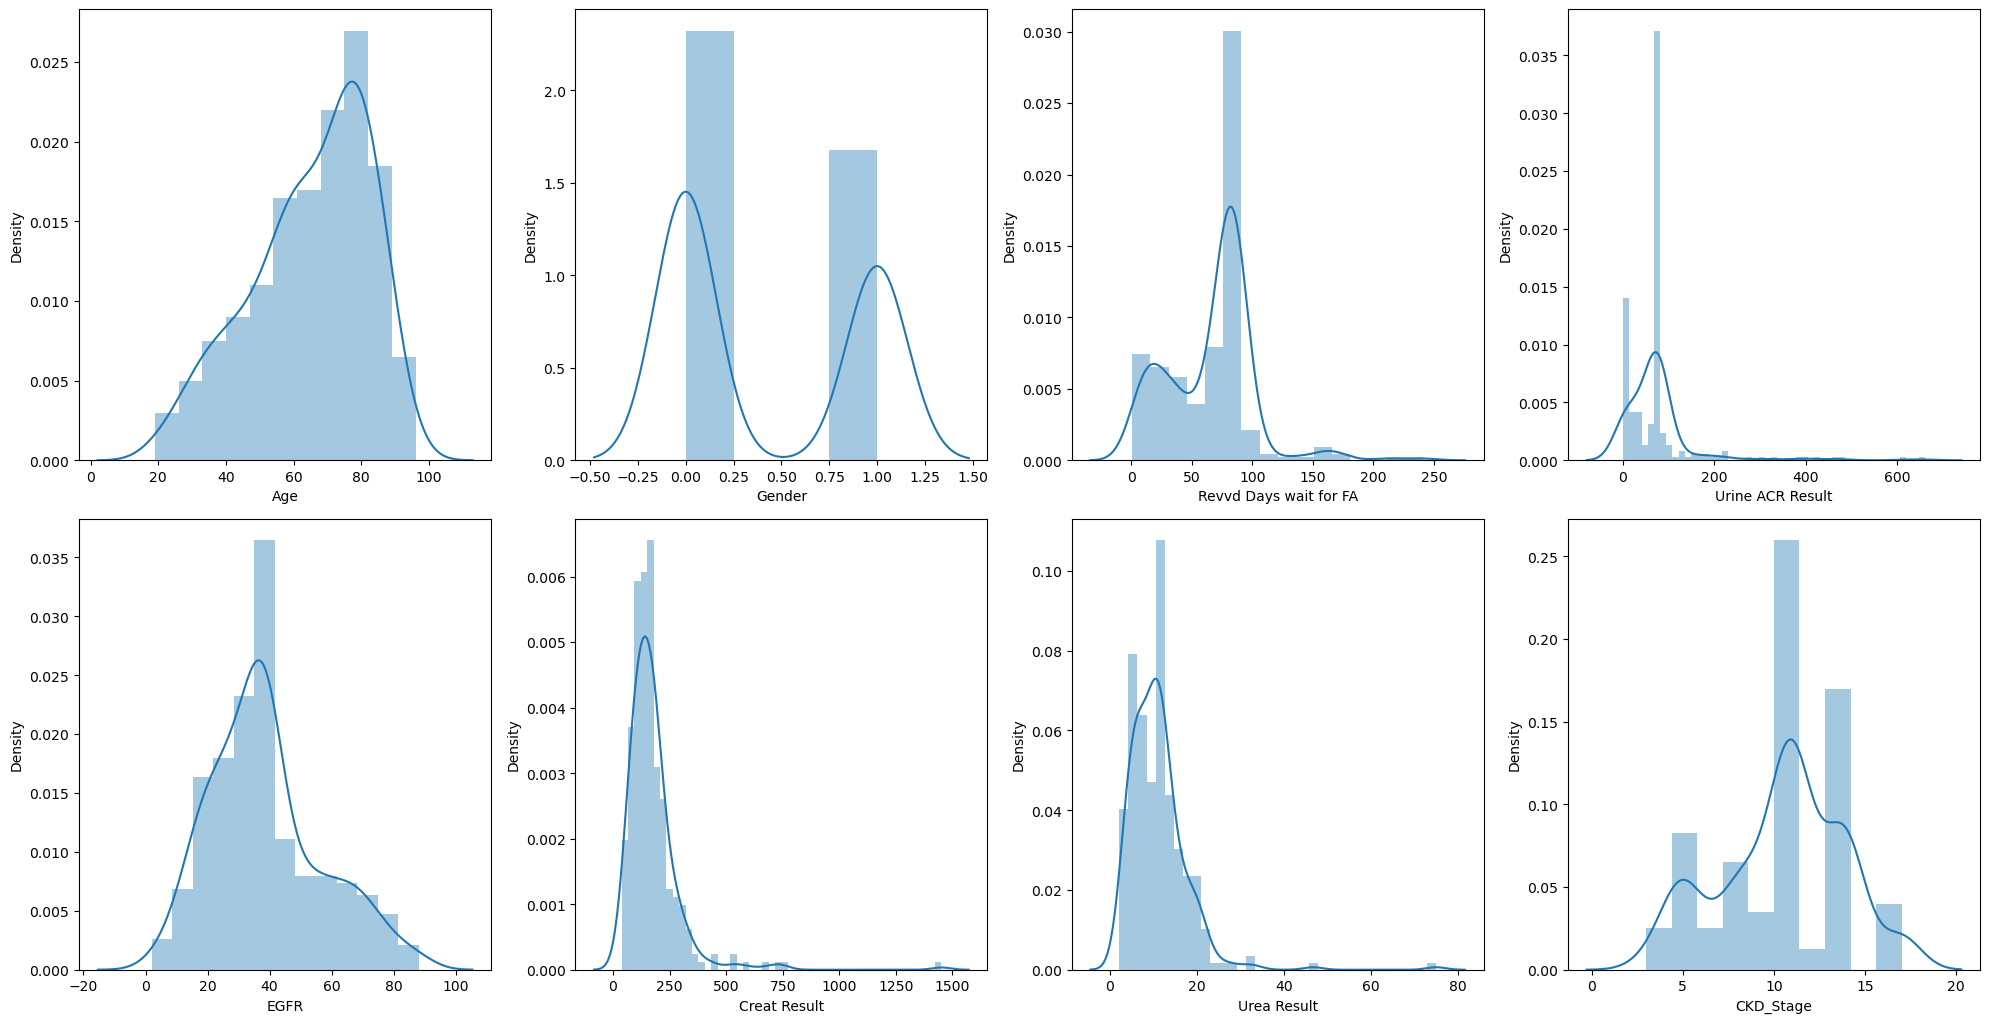

In [18]:

num_cols = [col for col in df.columns if df[col].dtype != 'object']
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

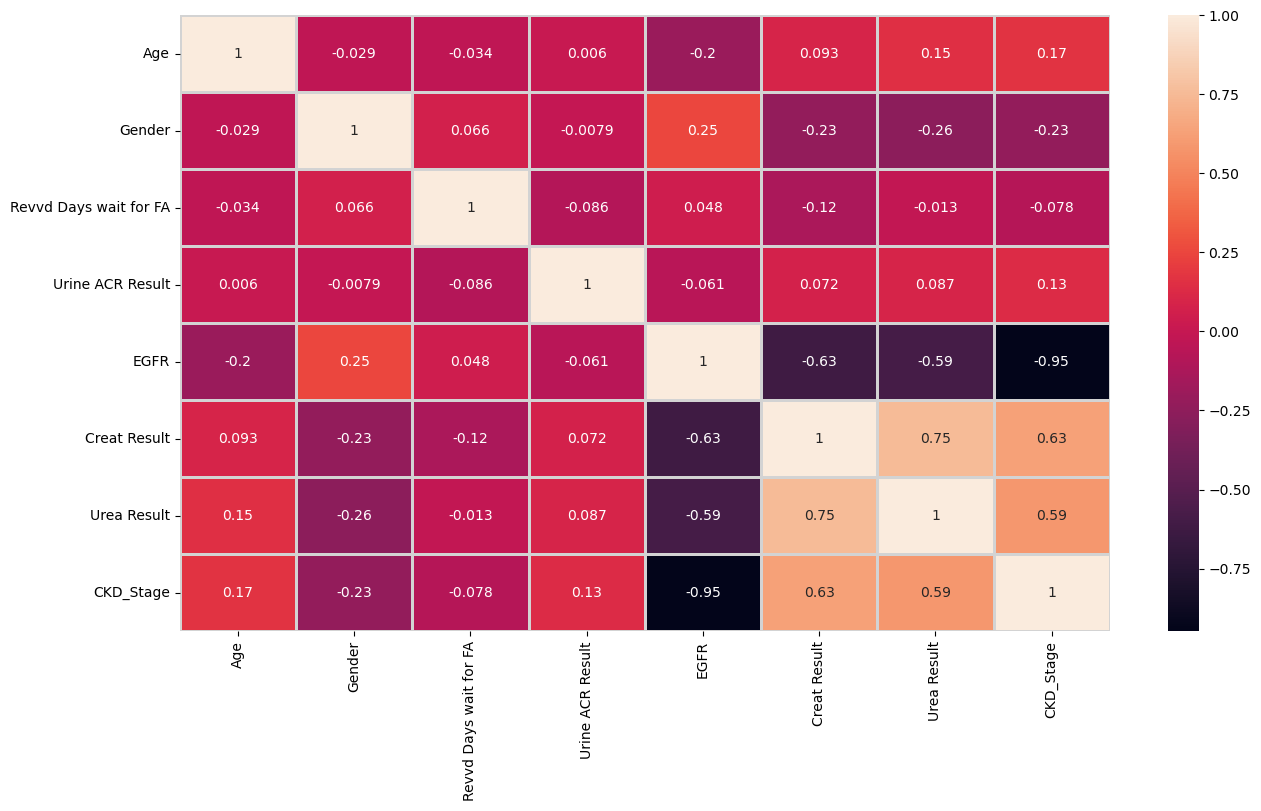

In [19]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [20]:
def violin(col):
    fig = px.violin(df, y=col, x="CKD_Stage", color="CKD_Stage", box=True, template = 'plotly_dark')
    return fig.show()

    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color='CKD_Stage',template = 'plotly_dark')
    return fig.show()

In [21]:
violin('Creat Result')

In [22]:
violin('Urea Result')

In [23]:
violin('Urine ACR Result')

In [24]:
violin('EGFR')

In [25]:
violin('Revvd Days wait for FA')

In [26]:
##The following scatter plots will displays data points representing different patients or instances.blood tests and other variables.
##Each data point corresponds to a combination of one or two variables and their CKD Stage.

In [27]:
scatter('Age','EGFR')

In [28]:
scatter ('EGFR','Creat Result') 

In [29]:
correlation=df[['CKD_Stage','EGFR', 'Creat Result']].corr()
print('Coeffiecient Correlation:',correlation)
#1. The correlation coefficient between "CKD Stage" and "EGFR" is -0.951665. This indicates a strong negative correlation between the two variables. As the CKD Stage increases, the EGFR tends to decrease.

#2. The correlation coefficient between "CKD Stage" and "Creatinine Result" is 0.625252. This indicates a moderate positive correlation between the two variables. As the CKD Stage increases, the Creatinine Result tends to increase as well.

#3. The correlation coefficient between "Creatinine Result" and "EGFR" is -0.625482. This indicates a moderate negative correlation between the two variables. As the Creatinine Result increases, the EGFR tends to decrease.

#Based on these correlations, it appears that there is a strong negative relationship between CKD Stage and EGFR, and a moderate positive relationship between CKD Stage and Creatinine Result.
# Additionally, there is a moderate negative relationship between Creatinine Result and EGFR.



Coeffiecient Correlation:               CKD_Stage      EGFR  Creat Result
CKD_Stage      1.000000 -0.947717      0.628481
EGFR          -0.947717  1.000000     -0.625482
Creat Result   0.628481 -0.625482      1.000000


In [30]:
## eGFR (Estimated Glomerular Filtration Rate):
##eGFR is an estimate of how well the kidneys filter waste products from the blood.
#It reflects kidney function and is typically reported in milliliters per minute per 1.73 square meters (ml/min/1.73 m²).
#Higher eGFR values indicate better kidney function.
#Urine ACR (Albumin to Creatinine Ratio):
#Urine ACR measures the amount of albumin (a protein) relative to creatinine (a waste product) in the urine.
#Elevated ACR levels suggest kidney damage or dysfunction.
#ACR is commonly used to detect early signs of kidney disease.
scatter('Urine ACR Result','EGFR')

In [31]:
correlation=df[['CKD_Stage','EGFR', 'Urine ACR Result']].corr()
print('Coeffiecient Correlation:',correlation)
##As eGFR decreases (indicating reduced kidney function), the risk of advanced CKD (stages 4 and 5) increases.
##Patients with eGFR below 30 ml/min/1.73 m² (GFR category G4 or G5) are at high risk for kidney failure (G5) 1.
##ACR also plays a role: Higher ACR levels (severely increased) are associated with more advanced CKD stages.
##Combined Impact:
#The scatter plot likely shows data points clustering in specific regions:
#Low eGFR (below 60 ml/min/1.73 m²) combined with elevated ACR (proteinuria) may indicate significant kidney damage.
#Such combinations are associated with higher CKD stages (3, 4, and 5).


Coeffiecient Correlation:                   CKD_Stage      EGFR  Urine ACR Result
CKD_Stage          1.000000 -0.947717          0.127860
EGFR              -0.947717  1.000000         -0.060532
Urine ACR Result   0.127860 -0.060532          1.000000


In [32]:

scatter('Revvd Days wait for FA', 'Age')

In [33]:
age=df['Age']
Revvd_days= df['Revvd Days wait for FA']
correlation_coefficient=age.corr(Revvd_days)
print('Correlation Coefficient:',correlation_coefficient)
##A correlation coefficient of -0.0344 indicates a very weak negative correlation between the age factor and the waiting days for the first appointment.
## This means that as the age factor increases, the waiting days for the first appointment may slightly decrease, but the relationship is almost negligible.



Correlation Coefficient: -0.03440644632978546


In [34]:


scatter('Revvd Days wait for FA','Creat Result')

In [35]:
#Variables:
#Revd Days wait for FA (First Appointment):
#Represents the number of days a patient has waited for their initial appointment.
#This waiting period likely pertains to the evaluation or assessment of their health condition.
#Creatinine Level:
#Indicates the level of creatinine in a patient’s blood.
#Creatinine is a waste product produced by muscle metabolism and is filtered by the kidneys.
#Elevated creatinine levels can be indicative of impaired kidney function.
##The color of the data points indicates the CKD (Chronic Kidney Disease) stage associated with that patient.
#Data Concentration:
#We continue to observe a dense cluster of data points at lower values of both Revd Days wait for FA and Creatinine Level.
#This suggests that many patients had relatively short waiting times for their initial appointment and favorable creatinine levels.
#The concentration remains pronounced for CKD stages 1 and 2.
#CKD Stages:
#The color-coding still reveals the representation of different CKD stages.
#Patients with CKD stages 1 and 2 continue to dominate the scatter plot.
#Fewer data points are visible for higher CKD stages (3, 4, and 5).
#Clinical Implications (Revisited):
#Early intervention (shorter waiting times) remains crucial for patients with CKD.
#Favorable creatinine levels at the initial appointment may contribute to better outcomes.
#Monitoring patients with higher CKD stages is essential, even if they are less represented in the dataset.

## Calculation Correlation Coefficient 
correlation=df[['CKD_Stage','Creat Result', 'Revvd Days wait for FA']].corr()
print('Coeffiecient Correlation:',correlation)
#1. The correlation coefficient between "CKD Stage" and "Revvd waiting days for first appointment" is -0.076155. This indicates a very weak negative correlation between the two variables.
# The CKD Stage and the number of days waiting for the first appointment do not have a strong linear relationship.

#2. The correlation coefficient between "CKD Stage" and "Creatinine Result" is 0.625252. This indicates a moderate positive correlation between the two variables.
# As the CKD Stage increases, the Creatinine Result tends to increase as well. This suggests that patients with a higher CKD Stage may have higher levels of creatinine, indicating potential kidney function impairment.

#3. The correlation coefficient between "Creatinine Result" and "Revvd waiting days for first appointment" is -0.122860. This indicates a very weak negative correlation between the two variables.
# The Creatinine Result and the number of days waiting for the first appointment do not have a strong linear relationship.


#A correlation coefficient of -0.1229 indicates a weak negative correlation between the creatinine level and the waiting days for the first appointment.
# This means that as the creatinine level increases, the waiting days for the first appointment tend to decrease slightly, but the relationship is not very strong.
#the negative sign indicates an inverse relationship, meaning that higher creatinine levels are associated with slightly shorter waiting days for the first appointment.

##since the correlation coefficient is close to zero and relatively weak, it suggests that there is not a strong linear relationship between the creatinine level and the waiting days for the first appointment.
# Therefore, making adjustments based solely on this correlation may not be impactful.



Coeffiecient Correlation:                         CKD_Stage  Creat Result  Revvd Days wait for FA
CKD_Stage                1.000000      0.628481               -0.077886
Creat Result             0.628481      1.000000               -0.122860
Revvd Days wait for FA  -0.077886     -0.122860                1.000000


In [36]:
# DECISION TREE CLASSIFIER

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9827586206896551 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      0.93      0.97        15
          12       0.00      0.00      0.00         0
          13       0.75      1.00      0.86         3

   micro avg       0.98      0.98      0.9

/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

